# Economy Analysis

### Introduction

### About Financial Data

<br>

##### Collecting financial data (Import CSV file)
<br>
- NASDAQ (NASDAQCOM) : 미국 나스닥 INDEX

-  10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity (T10Y2Y) : 10년물/2년물 채권 장단기 금리차
-  10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity (T10Y3M) : 10년물/3개월물 채권 장단기 금리차
-  Federal Funds Effective Rate (FEDFUNDS) : 미국 연방 기금 금리 (정책 금리)
-  New Privately-Owned Housing Units Started: Total Units (HOUST) : 미국 신규 주택 착공 (Annual Increase Rate)_
-  All Employees, Total Nonfarm (PAYEMS) : 미국 고용 인구 (비농업) _(Annual Increase Rate)_
-  Unemployment Rate (UNRATE) : 미국 실업률
-  Real Gross Domestic Product (GDPC1) : 미국 GDP 성장률 

      [Reference] [홍춘욱의 경제 강의 노트 - 75](https://www.youtube.com/watch?v=fdT5IVlquDs)<br>
      [Reference] [미국 증시 진짜 하락을 알 수 있는 1가지 신호 - 소수몽키](https://www.youtube.com/watch?v=xs7E_cHFgco&list=WL&index=10&t=1240s)

   <img src="https://fred.stlouisfed.org/graph/fredgraph.png?g=NT8v">

   <img src="https://fred.stlouisfed.org/graph/fredgraph.png?g=OdFs">
   <br>
   <p style="text-align: center;">
  <small>
    [See <a href="https://fred.stlouisfed.org/">[FED - US Economics State Index]</a>]
  </small>
</p>
<br>
   

### Import Python Library
- pandas
- numpy
- matplotlib
- FinanceDataReader (FRED)

<br>

#### Setting Plot Parameter
- font, grid, figsize, offset etc.

In [1]:
import pandas as pd
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Change graph background Color
sns.set_style("whitegrid")

# Font
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [2]:
# Import all data
df = fdr.DataReader(['NASDAQCOM', 'T10Y2Y','T10Y3M', 'FEDFUNDS', 'PAYEMS', 'HOUST', 'GDPC1', 'UNRATE'], data_source="fred")
df.head()

,T10Y2Y,T10Y3M,NASDAQCOM,FEDFUNDS,PAYEMS,HOUST,UNRATE,GDPC1
DATE,,,,,,,,
1970-01-01,NaN,NaN,NaN,8.98,71176.0,1085.0,3.9,4939.759
1970-02-01,NaN,NaN,NaN,8.98,71305.0,1305.0,4.2,4939.759
1970-03-01,NaN,NaN,NaN,7.76,71451.0,1319.0,4.4,4939.759
1970-04-01,NaN,NaN,NaN,8.10,71348.0,1264.0,4.6,4946.770
1970-05-01,NaN,NaN,NaN,7.95,71124.0,1290.0,4.8,4946.770


### Data Pre-processing
<br>

#### How to deal with data?

<br>

- NASDAQ, T10Y2Y, T10Y3M : View daily data
- FEDFUNDS, UNRATE : View Monthly Data
- HOUST, PAYEMS : View Monthly Data Percent Change Year-over-Year
- GDPC1 : View quaterly data Percent Change Year-over-Year


In [3]:
dfmonth = df.groupby(pd.Grouper(freq="M"))['FEDFUNDS', 'HOUST', 'PAYEMS', 'UNRATE'].mean()

for x in ['HOUST', 'PAYEMS']:
    index = x + "_monthly_yoy"
    diff_yoy = round((dfmonth[x] - dfmonth[x].shift(12))/dfmonth[x].shift(12)*100,2)
    dfmonth[index] = diff_yoy

dfmonth.dropna(inplace=True)

/home/chahohyun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [4]:
dfquarter = df.groupby(pd.Grouper(freq="Q"))['GDPC1'].mean()
gdp_quarter_yoy = round((dfquarter - dfquarter.shift(4))/dfquarter.shift(4)*100, 2)
gdp_quarter_yoy = gdp_quarter_yoy.dropna()

In [5]:
dfmonth = dfmonth.drop(["HOUST","PAYEMS"], axis=1)
df1 = pd.merge(dfmonth, gdp_quarter_yoy, how='left', on="DATE")
df1['GDPC1'] = df1['GDPC1'].fillna(method='ffill').fillna(method='bfill')
df1 = df1.rename(columns={'GDPC1':'GDP_quaterly_yoy'})
df1.head()

,FEDFUNDS,UNRATE,HOUST_monthly_yoy,PAYEMS_monthly_yoy,GDP_quaterly_yoy
DATE,,,,,
1971-01-31,4.14,5.9,68.48,-0.44,2.7
1971-02-28,3.72,5.9,33.41,-0.70,2.7
1971-03-31,3.71,6.0,44.81,-0.83,2.7
1971-04-30,4.16,5.9,57.12,-0.44,2.7
1971-05-31,4.63,5.9,58.84,0.17,2.7


In [6]:
df = df.drop(["FEDFUNDS", "PAYEMS", "HOUST", "UNRATE", "GDPC1"], axis=1)
total_data = pd.merge(df, df1, how='left', on="DATE")

for x in ["FEDFUNDS", 'UNRATE',	'HOUST_monthly_yoy', 'PAYEMS_monthly_yoy',  'GDP_quaterly_yoy']:
    total_data[x] = total_data[x].fillna(method='bfill')

# Change Scale
total_data['HOUST_monthly_yoy_0.1'] = total_data['HOUST_monthly_yoy']/10
total_data = total_data.drop('HOUST_monthly_yoy', axis=1)
total_data.head()

,T10Y2Y,T10Y3M,NASDAQCOM,FEDFUNDS,UNRATE,PAYEMS_monthly_yoy,GDP_quaterly_yoy,HOUST_monthly_yoy_0.1
DATE,,,,,,,,
1970-01-01,NaN,NaN,NaN,3.71,6.0,-0.83,2.7,4.481
1970-02-01,NaN,NaN,NaN,3.71,6.0,-0.83,2.7,4.481
1970-03-01,NaN,NaN,NaN,3.71,6.0,-0.83,2.7,4.481
1970-04-01,NaN,NaN,NaN,3.71,6.0,-0.83,2.7,4.481
1970-05-01,NaN,NaN,NaN,3.71,6.0,-0.83,2.7,4.481


### Exploratory Data Analysis (EDA)

#### Visualization

##### NASDAQ

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


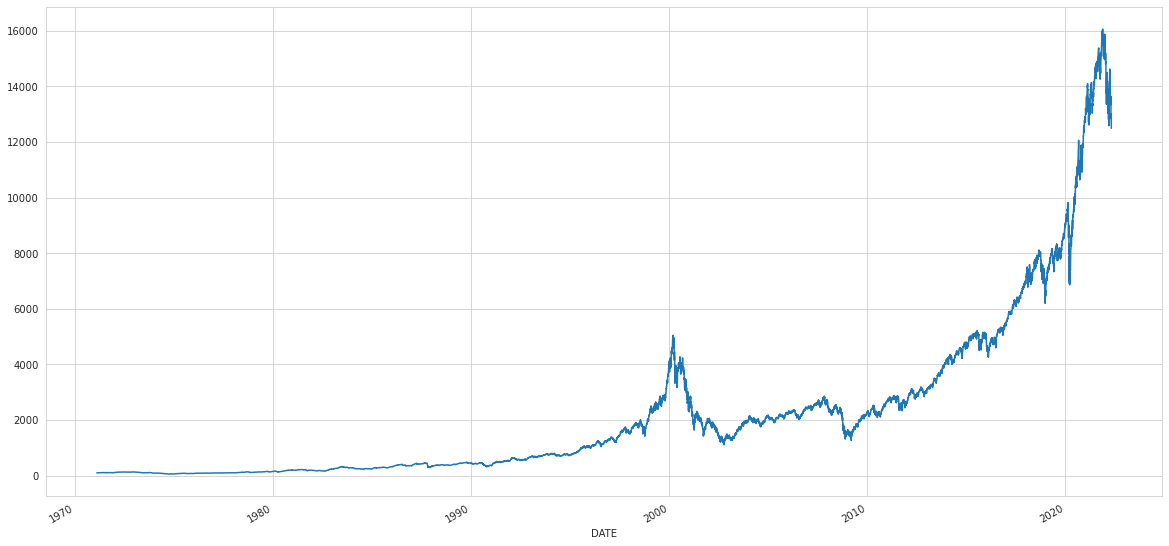

In [7]:
ax = total_data["NASDAQCOM"].plot()

- Purpose: Analysis of economic crises requiring significant portfolio changes.

It is difficult to identify historical data due to the rapid increase in Nasdaq Index.
So let's look at the 1900's and 2000's separately.


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


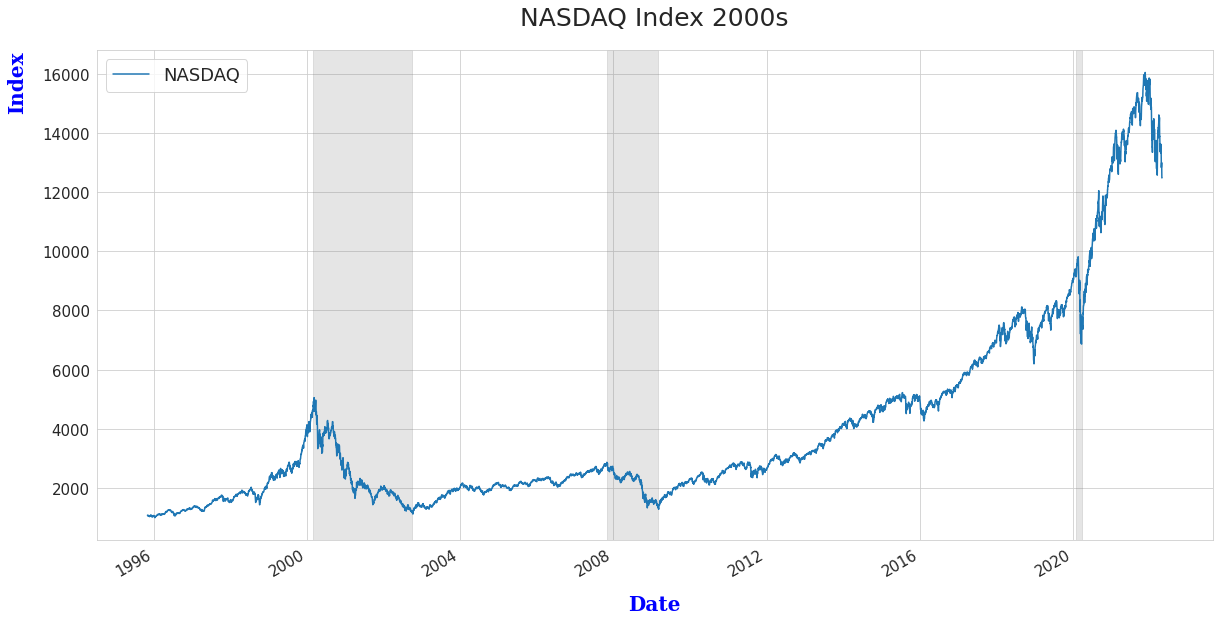

In [8]:
# 1995 ~ 2022 years
af_00 = total_data["NASDAQCOM"].iloc[-7000:].plot(label="NASDAQ")

# Dot-com Bubble
af_00.axvspan('2000-03-01', '2002-09-30', color='gray', alpha=0.2)
# SubPrime Mortgage Crisis
af_00.axvspan('2007-11-01', '2009-03-06', color='gray', alpha=0.2)
# Covid 19
af_00.axvspan('2020-02-01', '2020-03-23', color='gray', alpha=0.2)

plt.legend(loc='upper left', fontsize=18)
plt.title('NASDAQ Index 2000s', fontsize=25, pad=25)
plt.xlabel('Date', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('Index', fontsize=20, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'}, loc='top')
plt.xticks(fontsize = 15)
plt.yticks(fontsize =15)
plt.savefig('NASDAQ_Index_2000s')

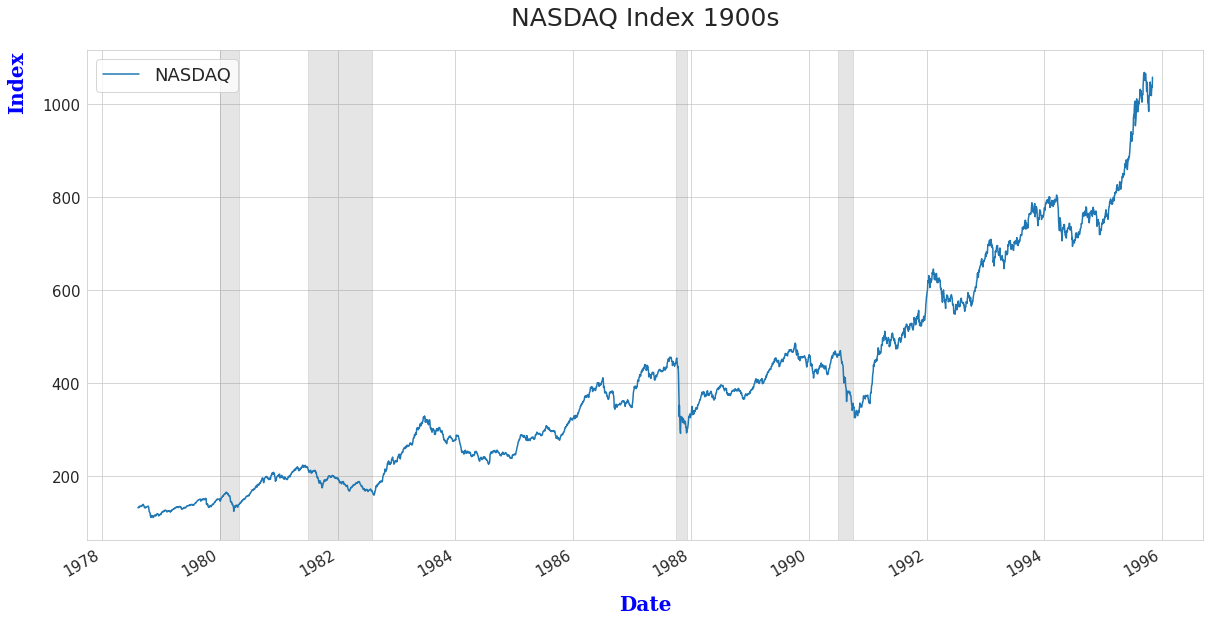

In [9]:
# 1980 ~ 1995 years
bf_00 = total_data["NASDAQCOM"].iloc[2000:-7000].plot(label="NASDAQ")

# Second Energy Crisis - Inflation
bf_00.axvspan('1980-01-01', '1980-05-01', color='gray', alpha=0.2)
# Double Dip Recession - Inflation
bf_00.axvspan('1981-07-01', '1982-08-01', color='gray', alpha=0.2)
# Black Monday
bf_00.axvspan('1987-10-01', '1987-12-10', color='gray', alpha=0.2)
# The Gulf-War
bf_00.axvspan('1990-07-01', '1990-10-01', color='gray', alpha=0.2)

plt.legend(loc='upper left', fontsize=18)
plt.title('NASDAQ Index 1900s', fontsize=25, pad=25)
plt.xlabel('Date', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('Index', fontsize=20, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'}, loc='top')
plt.xticks(fontsize = 15)
plt.yticks(fontsize =15)
plt.savefig('NASDAQ_Index_1900s')

- Reference : [미국의 경제 불황 역사: 1980년대](https://the-day-after-tomorrow.tistory.com/22)

#### How to predict a recession by ecnomic value?

#### Economic Index

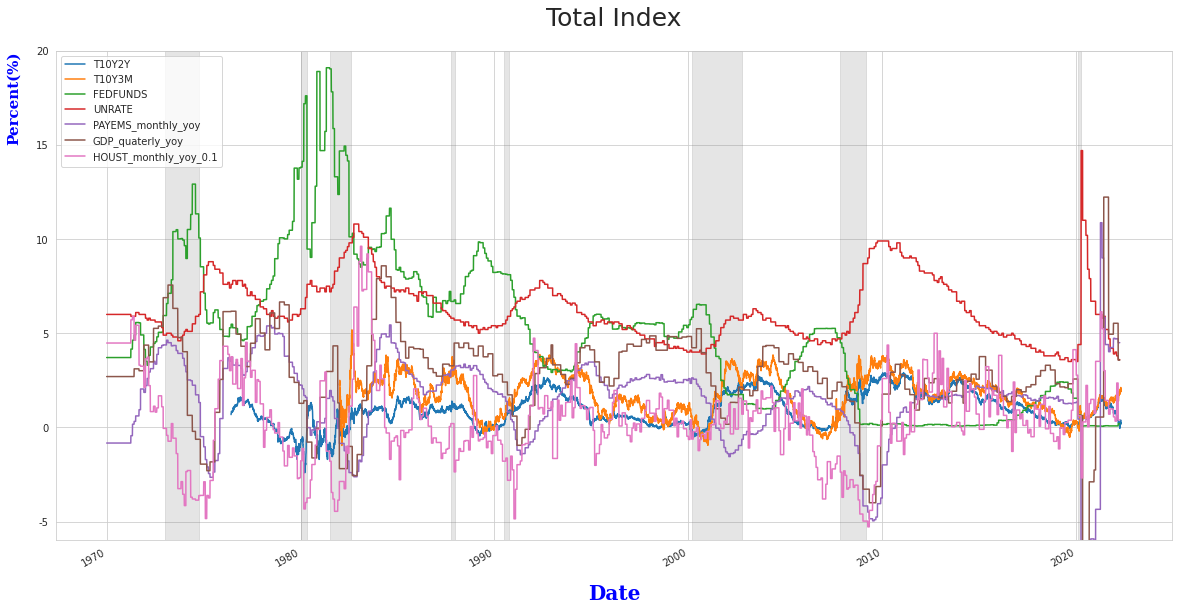

In [10]:
cols = list(total_data.columns.drop('NASDAQCOM'))
ax = total_data[cols].plot()

# First Energy Crisis - Inflation
ax.axvspan('1973-01-04', '1974-10-01', color='gray', alpha=0.2)
# Second Energy Crisis - Inflation
ax.axvspan('1980-01-01', '1980-05-01', color='gray', alpha=0.2)
# Double Dip Recession - Inflation
ax.axvspan('1981-07-01', '1982-08-01', color='gray', alpha=0.2)
# Black Monday
ax.axvspan('1987-10-01', '1987-12-10', color='gray', alpha=0.2)
# The Gulf-War
ax.axvspan('1990-07-01', '1990-10-01', color='gray', alpha=0.2)
# Dot-com Bubble
ax.axvspan('2000-03-01', '2002-09-30', color='gray', alpha=0.2)
# SubPrime Mortgage Crisis
ax.axvspan('2007-11-01', '2009-03-06', color='gray', alpha=0.2)
# Covid 19
ax.axvspan('2020-02-01', '2020-03-23', color='gray', alpha=0.2)

plt.legend(loc='upper left', fontsize=10)
plt.ylim(-6, 20)
plt.title('Total Index', fontsize=25, pad=25)
plt.xlabel('Date', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('Percent(%)', fontsize=15, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'}, loc='top')
plt.savefig('Total Figure')

#### Review comments

<br>

1) 10/2년 국채 장단기 금리차 (T10Y2Y) & 10년/3개월 국채 장단기 금리차 (T10Y3M) 
 - 두 지표 모두 *0보다 작은 경우*, 대부분의 *경기 침체가 시작*
 - But 2007년(Sub-Prime)의 경우 1년 정도 빠르게 나타나면서, NASDAQ 기준으로 10% 상승 이후, -50%를 기록함. 즉, 10% 상승기 동안 비중을 천천히 줄여나가는 전략이 필요.
 - 2020년(COVID)의 경우 약 3일만 0보다 작은 지표를 보여주고 고점 대비 -30%를 기록함.
 - 2000년(DOT-COM)의 경우 T10Y3M 기준으로 -0.95%의 강한 지표를 보여주며, -70% 이상의 폭락을 보여줌.
 - **선행 지표로 삼는 것은 적절해보이며, T10Y3M 최저점의 값에 따라 NADAQ의 낙폭이 비례함함** => 정확도 100%

<br>

2) 미국 연방 기금 금리 (FEDFUNDS) 
 - Dot-Com 버블을 제외하고 모두 금리를 동결시키고 인하하기 시작하면, 경제 위기가 시작됨.
 - 2000년 닷컴버블은 지나친 주가 상승으로 인해, 금리 인하를 미룬 것으로 파악되며, 특수성을 가졌다고 판단
 - 따라서 금리 동결 후 인하는 **선행 지표로 불 수 있다.**

<br>


3) 미국 신규 주택 착공 증가율 (HOUST) : DATA를 한 그래프에 표현하기 위해, Annualy 증감율로 표현했고 value를 /10을 함.
 - 2000년 Dot-Com Bubble, 2020년 COVID를 제외하고 금융위기 전에 급격하게 감소함. 
 - 증감율 기준으로 -20%가 되면 위기의 선행 지표로 볼 수 있을 것으로 보이고 위기의 정점에선 -40%까지 떨어지는 것으로 확인
 - 즉 모든 위기 전에 -20% ~ -40%를 기록한 것은 아니나, **-20%를 기록하면, 위기가 왔음**
 - **선행지표로 볼 수 있으나, 100%는 아님**

<br>


4) 미국 고용 인구 증가율 (PAYEMS)
 - 위기가 시작되면 급격하게 감소함
 - 또한 약 2년전 퍼센트 증감율에 비해 급격히 감소하고 FEDFUNDS도 같이 동결 및 인하 시엔 위기 발생함
 - But FEDFUNDS와 PAYEMS 모두 감소하는 시기(1980s/90s 중반)도 있으나, 위기는 안왔음.
   => 적절한 금리 인하로 경제 위기 모면했다고 해석됨
 - 즉 **선행 지표**로 볼 수 있으나, 장단기 금리차와 함께 봐야함

Analyze in detail by each period and index.

1. Index

- FEDFUNDS, T10Y2Y, T10Y3M, GDPC1
- FEDFUNDS, UNRATE, PAYEMS, HOUST

<br>

2.Period

- 2012 ~ 2022
- 2003 ~ 2012
- 1996 ~ 2003

<br>

+ Inflation Period
 - First Energy Crisis - Inflation ('1973-01-04', '1974-10-01')
 - Second Energy Crisis - Inflation ('1980-01-01', '1980-05-01')
 - Double Dip Recession - Inflation ('1981-07-01', '1982-08-01')

In [11]:
total_data.reset_index(inplace=True)
total_data['year'] = total_data['DATE'].dt.year
total_data['month'] = total_data['DATE'].dt.month
total_data['day'] = total_data['DATE'].dt.day
total_data.set_index("DATE", inplace=True)

# Change Scale
total_data["GDP_quaterly_yoy_0.2"] = total_data['GDP_quaterly_yoy']*0.2

,T10Y2Y,T10Y3M,NASDAQCOM,FEDFUNDS,UNRATE,PAYEMS_monthly_yoy,GDP_quaterly_yoy,HOUST_monthly_yoy_0.1,year,month,day,GDP_quaterly_yoy_0.2
DATE,,,,,,,,,,,,
1970-01-01,NaN,NaN,NaN,3.71,6.0,-0.83,2.7,4.481,1970,1,1,0.54
1970-02-01,NaN,NaN,NaN,3.71,6.0,-0.83,2.7,4.481,1970,2,1,0.54
1970-03-01,NaN,NaN,NaN,3.71,6.0,-0.83,2.7,4.481,1970,3,1,0.54
1970-04-01,NaN,NaN,NaN,3.71,6.0,-0.83,2.7,4.481,1970,4,1,0.54
1970-05-01,NaN,NaN,NaN,3.71,6.0,-0.83,2.7,4.481,1970,5,1,0.54


#### Covid 19 Crisis

Text(0, 1, 'Percent(%)')

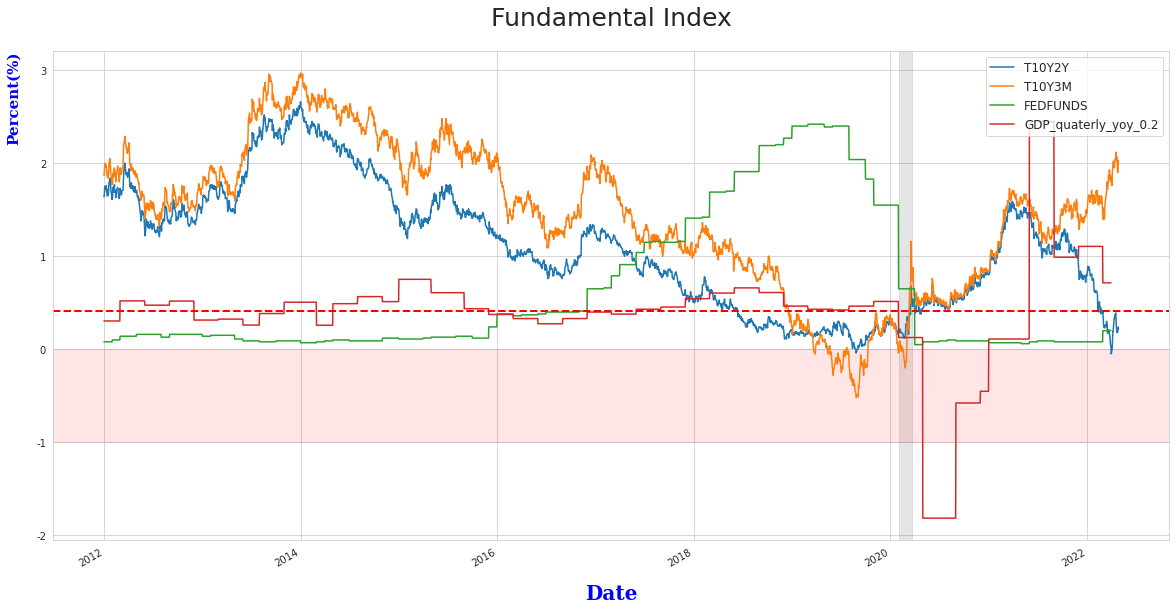

In [18]:
df_rct = total_data.loc[total_data['year'] >= 2012]

ax = df_rct[["T10Y2Y", "T10Y3M", "FEDFUNDS", 'GDP_quaterly_yoy_0.2']].plot()
# Recent Period GDP Average Groth Rate
gdp_avg = df_rct['GDP_quaterly_yoy_0.2'].mean()
plt.axhline(gdp_avg, 0, 1, color='red', linestyle='--', linewidth=2)

# Covid 19
ax.axvspan('2020-02-01', '2020-03-23', color='gray', alpha=0.2)
# Treasury < 0
ax.axhspan(0,-1, color='red', alpha=0.1)

plt.legend(loc='upper right', fontsize=12)
plt.title('Fundamental Index', fontsize=25, pad=25)
plt.xlabel('Date', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('Percent(%)', fontsize=15, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'}, loc='top')
# # plt.savefig('Total Figure')

Text(0, 1, 'Percent(%)')

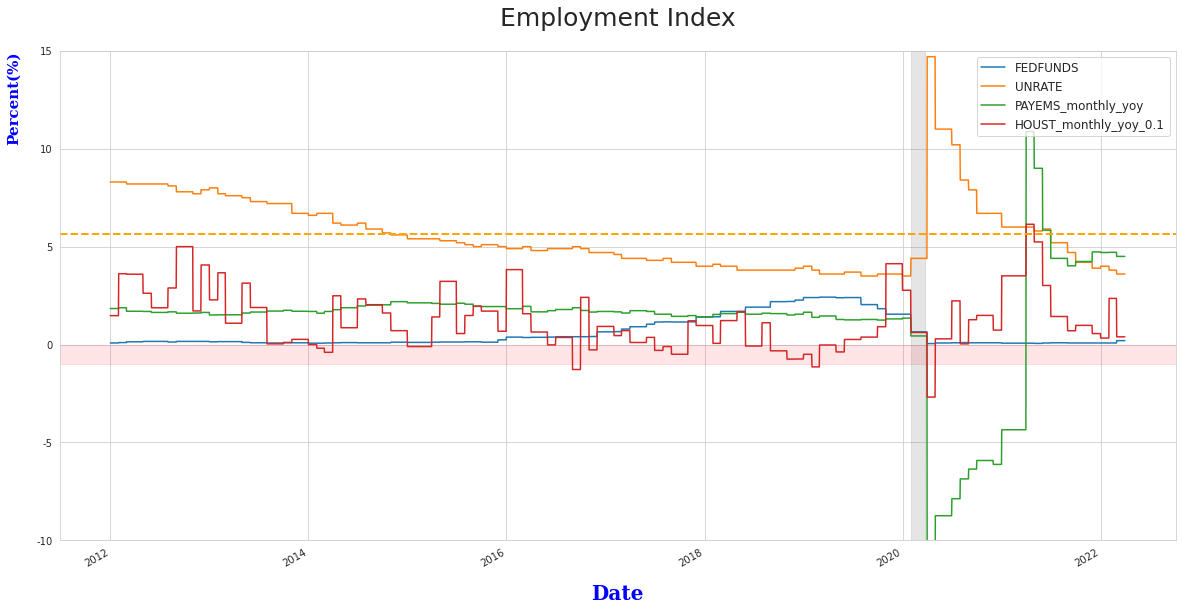

In [28]:
ax = df_rct[['FEDFUNDS','UNRATE', 'PAYEMS_monthly_yoy', 'HOUST_monthly_yoy_0.1']].plot()
# Recent Period UNRATE Average Rate
unrate_avg = df_rct['UNRATE'].mean()
# unrate_avg = total_data['UNRATE'].mean()

plt.axhline(unrate_avg, 0, 1, color='orange', linestyle='--', linewidth=2)

# Covid 19
ax.axvspan('2020-02-01', '2020-03-23', color='gray', alpha=0.2)
# Treasury < 0
ax.axhspan(0,-1, color='red', alpha=0.1)

plt.ylim(-10, 15)
plt.legend(loc='upper right', fontsize=12)
plt.title('Employment Index', fontsize=25, pad=25)
plt.xlabel('Date', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('Percent(%)', fontsize=15, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'}, loc='top')
# # plt.savefig('Total Figure')

##### Detail Analysis

<br>

 - FEDFUNDS : Decreasing
 - T10Y2Y & T10Y3M : Below Value 0 
 - HOUST & PAYEMS : Not related

 → COVID 위기는 경제 위기라기 보단 팬데믹 선언으로 인한 글로벌 소비 위축 등 경제 위기에 대한 두려움 + 즉각적인 통화, 재정 정책 부양으로 위기 탈출

#### Sub-prime Mortgage Crisis

In [30]:
df_10s = total_data.loc[(total_data['year'] <= 2012) & (total_data['year'] >= 2003)]

Text(0, 1, 'Percent(%)')

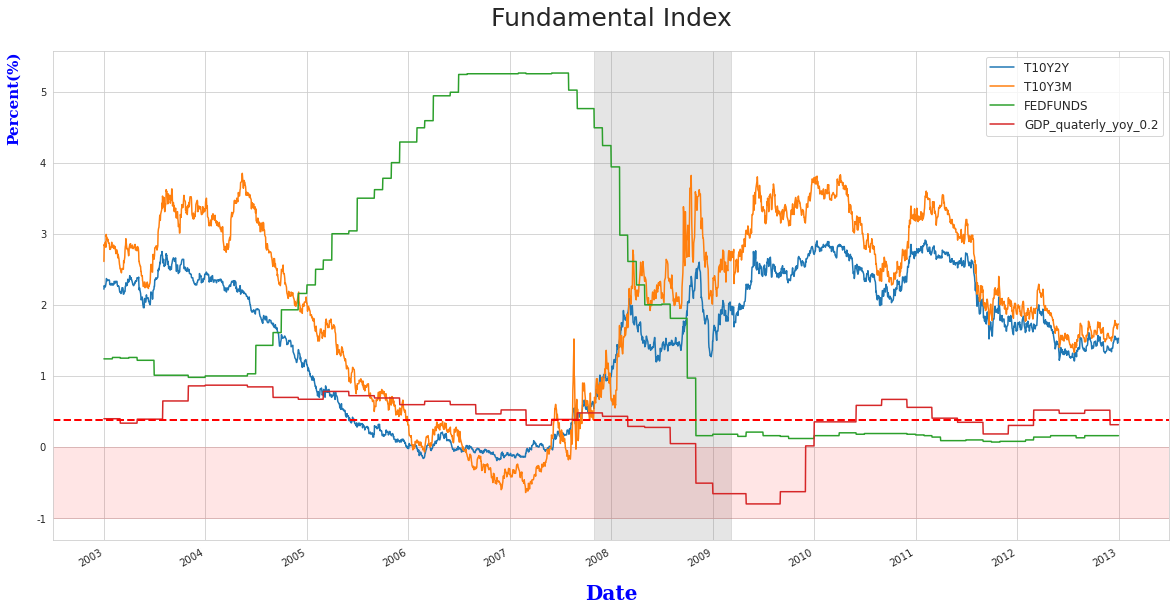

In [32]:
ax = df_10s[["T10Y2Y", "T10Y3M", "FEDFUNDS", 'GDP_quaterly_yoy_0.2']].plot()
# Recent Period GDP Average Groth Rate
gdp_avg = df_10s['GDP_quaterly_yoy_0.2'].mean()
plt.axhline(gdp_avg, 0, 1, color='red', linestyle='--', linewidth=2)

# SubPrime Mortgage Crisis
ax.axvspan('2007-11-01', '2009-03-06', color='gray', alpha=0.2)
# Treasury < 0
ax.axhspan(0,-1, color='red', alpha=0.1)

plt.legend(loc='upper right', fontsize=12)
plt.title('Fundamental Index', fontsize=25, pad=25)
plt.xlabel('Date', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('Percent(%)', fontsize=15, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'}, loc='top')
# # plt.savefig('Total Figure')

##### Detail Analysis
 - FEDFUNDS : Decreasing
 - T10Y2Y & T10Y3M : Below Value 0 
 - HOUST : Sharply Decreasing
 - PAYEMS : Decreasing (2.17 → 0.9)
  → 주택 가격 버블로 인한 경제 위기 발생.